<a href="https://colab.research.google.com/github/ranzan97/Machine-Learning/blob/main/Iris_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # True labels

In [63]:
# Convert to a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [64]:
# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Apply KMeans clustering with 3 clusters (since we know there are 3 species in the Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [66]:
# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

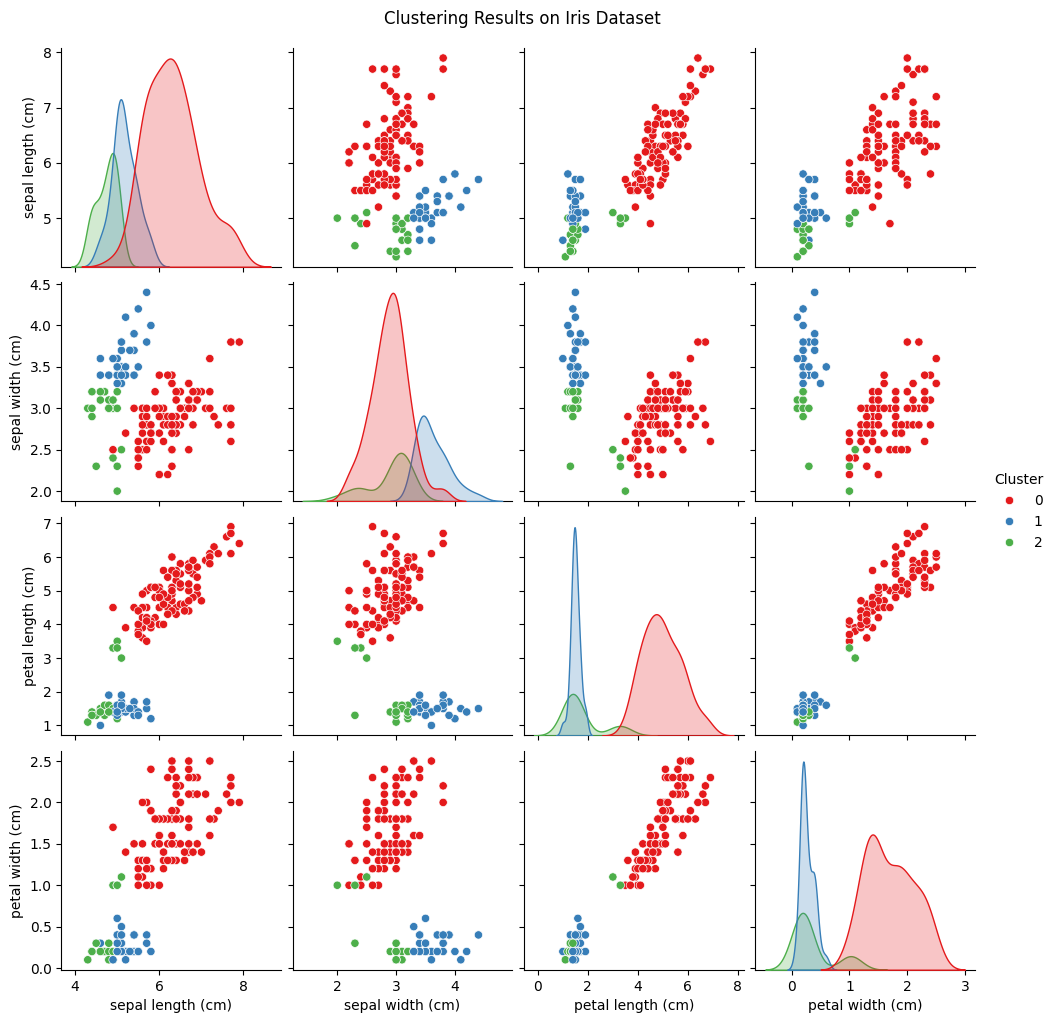

In [67]:
# Visualize the clusters using pairplot (only showing two dimensions for simplicity)
sns.pairplot(df, hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Clustering Results on Iris Dataset', y=1.02)
plt.show()

In [68]:
# Compare the true labels with the predicted clusters
print("\nTrue Labels vs Predicted Clusters:")
comparison_df = pd.DataFrame({'True Label': y, 'Predicted Cluster': clusters})
print(comparison_df)


True Labels vs Predicted Clusters:
     True Label  Predicted Cluster
0             0                  1
1             0                  2
2             0                  2
3             0                  2
4             0                  1
..          ...                ...
145           2                  0
146           2                  0
147           2                  0
148           2                  0
149           2                  0

[150 rows x 2 columns]


In [69]:
# Print the cluster centers
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)


Cluster Centers (scaled):
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


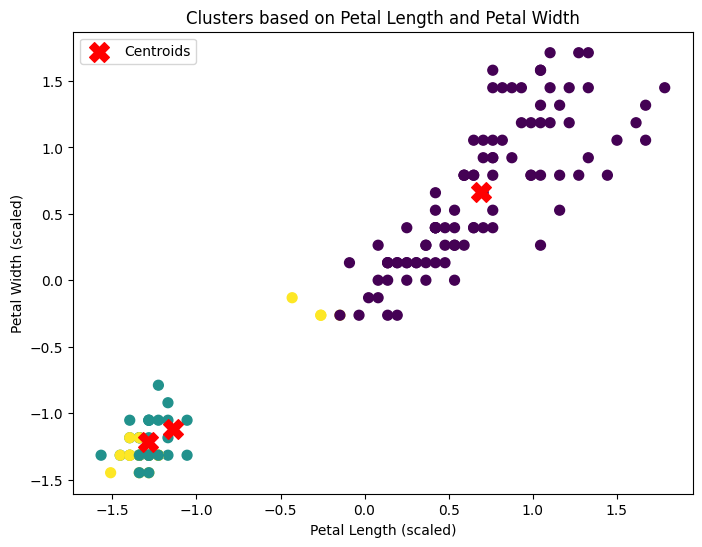

In [70]:
# Plotting the clusters based on two features: Petal Length and Petal Width
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters based on Petal Length and Petal Width')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend()
plt.show()